**Introduction**

The majority of people at one point in their life face the realities of real estate. Thus, I
have decided to prepare myself for the future by looking into possible factors contributing to
house prices. In this report, we explore the dataset about the selling price of houses in King 3
County from May 2014 to May 2015, published Kaggle.com . For the main part of this analysis, we construct a multiple regression model by the forward selection, using adjusted R-squared and R-squared since they are a better indicator of the degree to which the model explains the data, the fitness of the model than p-value . Also, we construct a p-value test to test the statistical significance of the model. Therefore, the question we are discovering is, “Based on the gathered data of the house sales in King County from May 2014 to May 2015, which factors affected the selling price of the house the most?”. Analyzing this question gives us valuable information about which properties of the house are better investments in case we decide to sell our house.


**Dataset**

The data is gathered from year-long research involving 21,613 houses in King County,
Washington. It comprises the sold price of the house, 19 house features, such as number of bedrooms, the size of the living room, and ID number for the sold house. Those columns serve as our alleged independent and dependent variables, respectively. The “price” column, continuous polytomous quantitative variable as we can see from the basic dataset information, is the responding variable with the unit of USD. The rest are predictor variables. However, instead of using all of them for our model, we are building a correlation matrix to check which of those variables have the highest correlation to the responding variable. Before creating a matrix, we look if there are any non-numerical values  and convert them into numerical. Then, we clear out the dataset  and start to process it.

In [3]:
#improting useful libraries 
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import statistics 
import statsmodels.api as statsmodels
import statsmodels.formula.api as sm
from scipy import stats
#dowload and read the csv file about King County House Data
file = pd.read_csv("kc_house_data.csv")
file.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [70]:
#using info() method get information about the types of data used as well as check for null values
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [29]:
#checking if there are any non-numeric variables to identify if we have any categorical variable
file.apply(lambda s: pd.to_numeric(s, errors = 'coerce').notnull().all())

id                True
date             False
price             True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot          True
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built          True
yr_renovated      True
zipcode           True
lat               True
long              True
sqft_living15     True
sqft_lot15        True
dtype: bool

In [30]:
#data processing 
#changing the format of the date to datetime format
file['date'] = pd.to_datetime(file['date'])
#calculating the age of the house by substracting from the date, year, house was sold the year the house was built 
#we will be using the age of the house to check if it is a variable contributing to the price of the house
file['house_age'] = file['date'].dt.year - file['yr_built']
#setting renovation value to 1 if the house was renovated and if not, to 0 
#we are doing this to be able to use this data easily as another variable in the house price predictions
file['renovated'] = file['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

#dropping used columns for our previous calculations
file = file.drop('date', axis=1)
file = file.drop('yr_renovated', axis=1)
file = file.drop('yr_built', axis=1)

#copy of the dataframe to use in futher calculations/coding when we need to drop some values out
file_1 = file.copy()
file.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [31]:
#calling on describe() function to check descriptive statistics such as standart deviation, mean, max and min values 
#and etc
file.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818,0.042289
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,0.201253
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000


In [32]:
#calculating median for every column in the dataset
for column in file:
    print(column + " median is ", np.median(file[column]))

id median is  3904930410.0
price median is  450000.0
bedrooms median is  3.0
bathrooms median is  2.25
sqft_living median is  1910.0
sqft_lot median is  7618.0
floors median is  1.5
waterfront median is  0.0
view median is  0.0
condition median is  3.0
grade median is  7.0
sqft_above median is  1560.0
sqft_basement median is  0.0
zipcode median is  98065.0
lat median is  47.5718
long median is  -122.23
sqft_living15 median is  1840.0
sqft_lot15 median is  7620.0
house_age median is  40.0
renovated median is  0.0


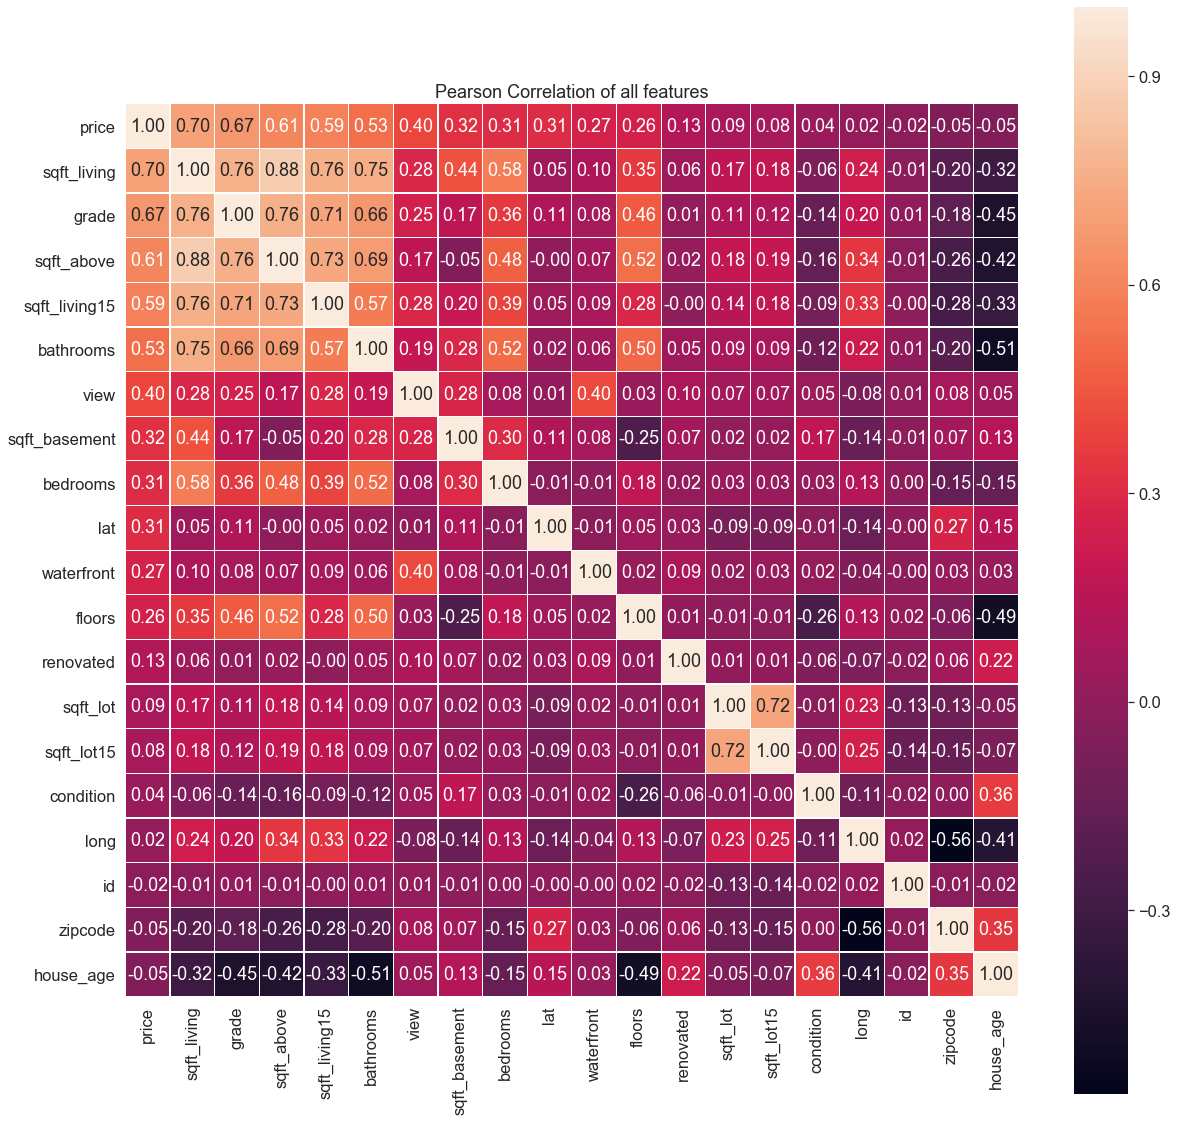

In [33]:
#using corr() function to find the pairwise correlation of all columns in our dataframe using pearson's 
#methond of standard correlation coefficient
correlation = file_1.corr(method='pearson')
#reordering data from biggest to largest values correlation values for better visual representation of the matrix
columns = correlation.nlargest(20, 'price').index
#getting Pearson product-moment correlation coefficients from our sorted data for correlation matrix
#using property T to reflect the dataframe over its main diagonal by writing columns as rows 
corr_map = np.corrcoef(file[columns].values.T)
#setting the font of text in the matrix to 1, so it is readable 
sns.set(font_scale=1.5)

#plotting color-encoded correlation matrix
#setting its size bigger
plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation of all features')
heatmap = sns.heatmap(corr_map, cbar = True, linewidths=0.25, linecolor='w', annot = True, square = True, fmt = '.2f', yticklabels = columns.values, xticklabels = columns.values)

#show the matrix
plt.show()

From the matrix we can select 5 independent variables which have correlation value more than 0.5. Those predictor variables are: ‘grade’ (0.67), ‘bathrooms’ (0.53), ‘sqft_living’ (0.70), ‘sqft_above’ (0.61), and ‘sfqt_living15’ (0.59). They indicate the overall grade given to the housing unit based on King County grading system, the number of bathrooms, area of living room, above and living room area in 2015 by square feet. The variable ‘bathrooms’ is discrete polytomous quantitative variable, while others are continuous polytomous quantitative variables. For this data, there can be confounding variables such as proximity of house to public transportation which can affect the price of the house as another predictor. Thus, we might not reach 100% explanation of the variance in the dependent variable 6 Based on this information,
we clear our dataset by dropping other columns to create a correlation matrix for those 5 independent predictors and dependent ‘price’ variable.

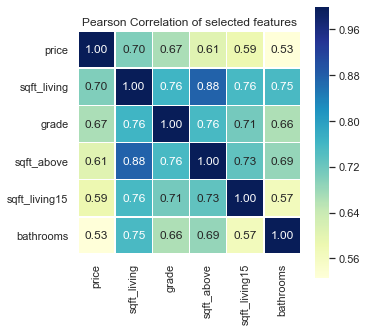

In [34]:
#droping all the columns which showed less than 50% correlation in the correlation matrix 
new_file = file_1.drop(['lat', 'view', 'bedrooms', 'sqft_basement', 'floors',
       'waterfront', 'renovated', 'sqft_lot', 'sqft_lot15', 'long',
       'condition', 'id', 'zipcode', 'house_age'], axis=1)
#using corr() function to find the pairwise correlation of all columns in our dataframe using pearson's 
#methond of standard correlation coefficient
correlation1 = new_file.corr(method='pearson')
#reordering data from biggest to largest values correlation values for better visual representation of the matrix
new_columns = correlation1.nlargest(20, 'price').index
#getting Pearson product-moment correlation coefficients from our sorted data for correlation matrix
#using property T to reflect the dataframe over its main diagonal by writing columns as rows 
corr_map1 = np.corrcoef(new_file[new_columns].values.T)
#setting the font of text in the matrix to 1, so it is readable 
sns.set(font_scale=1)

#plotting color-encoded correlation matrix
#title for the plot
#setting its size bigger
plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of selected features')
heatmap = sns.heatmap(corr_map1, cbar = True, linewidths=0.5, linecolor='w', cmap="YlGnBu", annot = True, square = True, fmt = '.2f', yticklabels = new_columns.values, xticklabels = new_columns.values)



In [35]:
new_file.head(5)

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [36]:
#calling on describe() function to check descriptive statistics such as standart deviation, mean, max and min values 
#and etc
new_file.describe()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,3.671272e+05,0.770163,918.440897,1.175459,828.090978,685.391304
min,7.500000e+04,0.000000,290.000000,1.000000,290.000000,399.000000
25%,3.219500e+05,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,4.500000e+05,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,6.450000e+05,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,7.700000e+06,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [37]:
#calculating mean, median and standart deviation of selected features
#numpy mean function which takes in a given list and returns the average of the elements in given list of data
mean_liv = np.mean(new_file['sqft_living'])
mean_grade = np.mean(new_file['grade'])
mean_above = np.mean(new_file['sqft_above'])
mean_liv15 = np.mean(new_file['sqft_living15'])
mean_bath = np.mean(new_file['bathrooms'])
#numpy median function which takes in a given list and returns the median of the list elements
median_liv = np.median(new_file['sqft_living'])
median_grade = np.median(new_file['grade'])
median_above = np.median(new_file['sqft_above'])
median_liv15 = np.median(new_file['sqft_living15'])
median_bath = np.median(new_file['bathrooms'])
#numpy std function which takes in a given list and returns the standard deviation, the spread of a distribution, 
#of the elements in a given list
sd_liv = np.std(new_file['sqft_living'])
sd_grade = np.std(new_file['grade'])
sd_above = np.std(new_file['sqft_above'])
sd_liv15 = np.std(new_file['sqft_living15'])
sd_bath = np.std(new_file['bathrooms'])
#using mode() function from statistics module
#the function is collecting and organizing each column to count the frequency of each result to find the most
#frequent one
mode_liv = statistics.mode(new_file['sqft_living'])
mode_grade = statistics.mode(new_file['grade'])
mode_above = statistics.mode(new_file['sqft_above'])
mode_liv15 = statistics.mode(new_file['sqft_living15'])
mode_bath = statistics.mode(new_file['bathrooms'])
#calculating Pearson's mode skewness to see if any of the data is strongly skewed
#using first formula with mode as the dataset is pretty big (21000+ entrees), so mode will be reliable 
sk_liv = (mean_liv-median_liv)/sd_liv
sk_grade = (mean_grade-mode_grade)/sd_grade
sk_above = (mean_above-mode_above)/sd_above
sk_liv15 = (mean_liv15-mode_liv15)/sd_liv15
sk_bath = (mean_bath-mode_bath)/sd_bath

class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated stats
figure1 = pd.DataFrame({'House Feauture': ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Mean': [mean_liv, mean_grade, mean_above, mean_liv15, mean_bath],
                        'Median': [median_liv, median_grade, median_above, median_liv15, median_bath],
                        'Mode':[mode_liv, mode_grade, mode_above, mode_liv15, mode_bath],
                       'Standart Deviation':[sd_liv, sd_grade, sd_above, sd_liv15, sd_bath],
                        'Pearson’s Coefficient of Skewness':[sk_liv, sk_grade, sk_above, sk_liv15, sk_bath]
                       })
display('figure1')

,House Feauture,Mean,Median,Mode,Standart Deviation,Pearson’s Coefficient of Skewness
0,sqft_living,2079.899736,1910.00,1300.0,918.419649,0.184991
1,grade,7.656873,7.00,7.0,1.175432,0.558836
2,sqft_above,1788.390691,1560.00,1300.0,828.071820,0.589793
3,sqft_living15,1986.552492,1840.00,1540.0,685.375448,0.651544
4,bathrooms,2.114757,2.25,2.5,0.770145,-0.500221


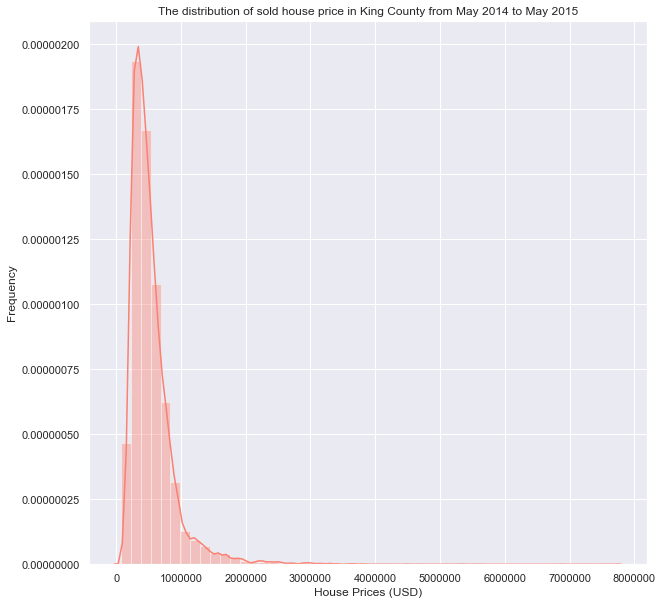

In [38]:
#making histograms using seaborn library for the house price in KC, WA
sns.set()
#setting its size bigger
plt.subplots(figsize=(10, 10))
#importing our data
sns.distplot(new_file['price'], color = 'salmon')
#labeling
plt.title("The distribution of sold house price in King County from May 2014 to May 2015")
plt.xlabel("House Prices (USD)")
plt.ylabel("Frequency")
plt.show()

In [39]:
#a fucntion for finding r-square adjusted
def mult_reg(column_x, column_y):
    # define predictor variables for X and response varaible for Y
    X = new_file[column_x]
    X = statsmodels.add_constant(X)
    Y = new_file[column_y]
    
    #ccreate a regression model using ordinary least squares model, OLS
    regmod = statsmodels.OLS(Y,X).fit() 
    #print adjusted r-squared extracted from the model
    print("Adjusted r-squared: ", regmod.rsquared_adj)

    
#make another copy of the data for further cleanings and processing     
file2 = new_file.copy()

#print adjusted r-square calculations
for column in file2.columns[1:]:
    print(column)
    mult_reg([column], 'price')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure2 = pd.DataFrame({'House Feauture': ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [0.4928297508369245, 0.44544282642144817, 0.36668244886126933,
                                               0.3426380442302088, 0.2757358874642971 ]})
display('figure2')

bathrooms
Adjusted r-squared:  0.2757358874642971


sqft_living
Adjusted r-squared:  0.4928297508369245


grade
Adjusted r-squared:  0.44544282642144817


sqft_above
Adjusted r-squared:  0.36668244886126933


sqft_living15
Adjusted r-squared:  0.3426380442302088




//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,House Feauture,Adjusted r-squared
0,sqft_living,0.492830
1,grade,0.445443
2,sqft_above,0.366682
3,sqft_living15,0.342638
4,bathrooms,0.275736


In [40]:
#as sqft_living had highest value, we pop it out 
file2.pop('sqft_living')
#print adjusted r-square for the 2-predictor model
for column in file2.columns[1:]:
    print(column)
    mult_reg([column, 'sqft_living'], 'price')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure3 = pd.DataFrame({'House Feauture': ['grade','sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [0.5344592988489001, 0.4932239426507642, 0.499710199551165,
                                               0.49285681741691645 ]})
display('figure3')

bathrooms
Adjusted r-squared:  0.49285681741691645


grade
Adjusted r-squared:  0.5344592988489001


sqft_above
Adjusted r-squared:  0.4932239426507642


sqft_living15
Adjusted r-squared:  0.499710199551165




,House Feauture,Adjusted r-squared
0,grade,0.534459
1,sqft_above,0.493224
2,sqft_living15,0.499710
3,bathrooms,0.492857


In [41]:
#as grade had highest value, we pop it out 
file2.pop('grade')
#print adjusted r-square for the 2-predictor model
for column in file2.columns[1:]:
    print(column)
    mult_reg([column, 'grade'], 'price')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure4 = pd.DataFrame({'House Feauture': [ 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [0.4692393164300258, 0.4697615930660304,
                                               0.4572694376406171 ]})
display('figure4')   

bathrooms
Adjusted r-squared:  0.4572694376406171


sqft_above
Adjusted r-squared:  0.4692393164300258


sqft_living15
Adjusted r-squared:  0.4697615930660304




,House Feauture,Adjusted r-squared
0,sqft_above,0.469239
1,sqft_living15,0.469762
2,bathrooms,0.457269


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:12:36   Log-Likelihood:            -2.9934e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.981e+05   1.33e+04    -44.978      0.000   -6.24e+05   -5.72e+05
sqft_living   184.4202      2.869     64.290      0.000     178.798     190.043
grade        9.855e+04   2241.331     43.972      0.000    9.42e+04    1.03e+05
==============================================================================
Omnibus:                    16989.468   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1009889.787
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      35.828   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

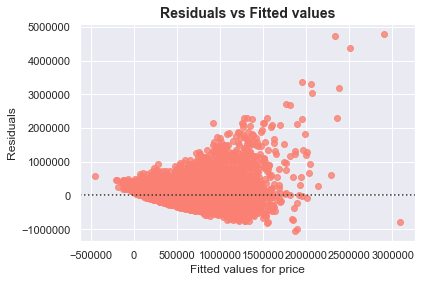

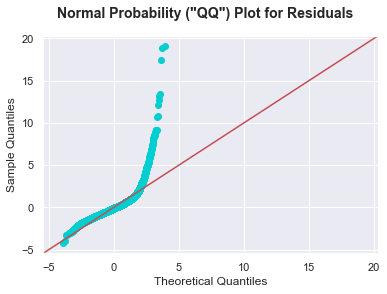

In [42]:
#final multple regression model 
# the code is adjusted from C51 2.2 class
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # define predictors X and response Y:
    X = new_file[column_x]
    X = statsmodels.add_constant(X)
    Y = new_file[column_y]

    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='salmon')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45', color = 'darkturquoise')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

mult_regression(['sqft_living', 'grade'], 'price')
regressionmodel.summary()
    

In [43]:
#using a logarithmic for data transformation to lessen skewness
new_file['price'] = np.log(new_file['price'])
#renaming the existing price column to match the values
new_file.rename(columns = {'price': 'log(price)'}, inplace=True)

#show the new dataset table
new_file.head(5)

,log(price),bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,12.309982,1.00,1180,7,1180,1340
1,13.195614,2.25,2570,7,2170,1690
2,12.100712,1.00,770,6,770,2720
3,13.311329,3.00,1960,7,1050,1360
4,13.142166,2.00,1680,8,1680,1800


In [76]:
#yet another copy for further usage
file3 = new_file.copy() 

#print adjusted r-square calculations
for column in file3.columns[1:]:
    print(column)
    mult_reg([column], 'log(price)')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure6 = pd.DataFrame({'House Feauture': ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [0.48347464813306507, 0.4950776171986053, 0.3621353947361615,
                                               0.38351873945944115, 0.3033505271167094]})
#yet another copy for further usage
file4 =file3.copy()
file5 =file3.copy()
display('figure6')

bathrooms
Adjusted r-squared:  0.3033505271167094


sqft_living
Adjusted r-squared:  0.48347464813306507


grade
Adjusted r-squared:  0.4950776171986053


sqft_above
Adjusted r-squared:  0.3621353947361615


sqft_living15
Adjusted r-squared:  0.38351873945944115




,House Feauture,Adjusted r-squared
0,sqft_living,0.483475
1,grade,0.495078
2,sqft_above,0.362135
3,sqft_living15,0.383519
4,bathrooms,0.303351


In [45]:
#as sqft_living had highest value, we pop it out 
file3.pop('grade')
#print adjusted r-square calculations
for column in file3.columns[1:]:
    print(column)
    mult_reg([column, 'grade'], 'log(price)')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure7 = pd.DataFrame({'House Feauture': ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [0.5552536292493113,  0.5064584348276638,
                                              0.5231456356029192, 0.5073752580237221]})
display('figure7')

bathrooms
Adjusted r-squared:  0.5073752580237221


sqft_living
Adjusted r-squared:  0.5552536292493113


sqft_above
Adjusted r-squared:  0.5064584348276638


sqft_living15
Adjusted r-squared:  0.5231456356029192




,House Feauture,Adjusted r-squared
0,sqft_living,0.555254
1,sqft_above,0.506458
2,sqft_living15,0.523146
3,bathrooms,0.507375


In [46]:
#as sqft_living had highest value, we pop it out 
file3.pop('sqft_living')
#print adjusted r-square calculations
for column in file3.columns[1:]:
    print(column)
    mult_reg([column, 'sqft_living'], 'log(price)')
    print('\n')
    
#making a table to display visually results
class display(object):
    #Display HTML representation of multiple objects, the code for formating a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated adjusted r-squared
figure8 = pd.DataFrame({'House Feauture': [ 'sqft_above', 'sqft_living15', 'bathrooms'],
                        'Adjusted r-squared': [ 0.48370891568124397,
                                              0.503817732300692, 0.485027581297363]})
display('figure8')

bathrooms
Adjusted r-squared:  0.485027581297363


sqft_above
Adjusted r-squared:  0.48370891568124397


sqft_living15
Adjusted r-squared:  0.503817732300692




,House Feauture,Adjusted r-squared
0,sqft_above,0.483709
1,sqft_living15,0.503818
2,bathrooms,0.485028


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(price)   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.349e+04
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:45:10   Log-Likelihood:                -8052.8
No. Observations:               21613   AIC:                         1.611e+04
Df Residuals:                   21610   BIC:                         1.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1740      0.019    599.261      0.000      11.137      11.211
sqft_living     0.0002   4.02e-06     54.084      0.000       0.000       0.000
grade           0.1856      0.003     59.067      0.000       0.179       0.192
==============================================================================
Omnibus:                       55.796   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.416
Skew:                           0.115   Prob(JB):                     9.26e-13
Kurtosis:                       2.907   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

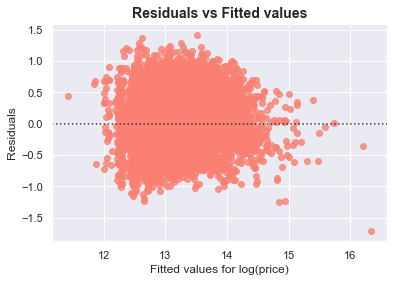

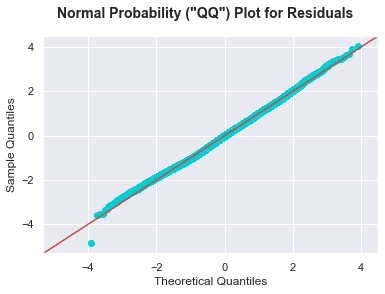

In [67]:
#final multple regression model 
# the code is adjusted from C51 2.2 class
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # define predictors X and response Y:
    X = new_file[column_x]
    X = statsmodels.add_constant(X)
    Y = new_file[column_y]

    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='salmon')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45', color = 'darkturquoise')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

mult_regression(['sqft_living', 'grade'], 'log(price)')
regressionmodel.summary()
    

In [50]:
#a function to calculate the VIF, Variance Inflation Factor, values
def vif_cal(input_data, dependent_col):
    #setting input data to not include dependent variable
    x_var = input_data.drop([dependent_col], axis = 1)
    #getting names of the independent variable columns
    xvar_names = x_var.columns
    #iterating through every independent variable
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        #regressing each independent variable 
        rsq = sm.ols(formula = "y~x", data = x_vars).fit().rsquared  
        #calculating VIF value 
        vif = round(1/(1-rsq),2)
        #printing out the result for each independent variable
        print (xvar_names[i], " VIF = " , vif)
        

In [49]:
#poping out not selected varaibles such as bathrooms, sqft_living15, sqft_above
file4.pop('bathrooms')
file4.pop('sqft_above')
file4.pop('sqft_living15')
#Calculating VIF values using that function
vif_cal(input_data = file4, dependent_col="log(price)")

sqft_living  VIF =  2.39
grade  VIF =  2.39


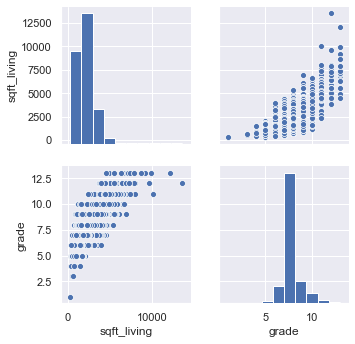

In [58]:
sns.pairplot(file4)

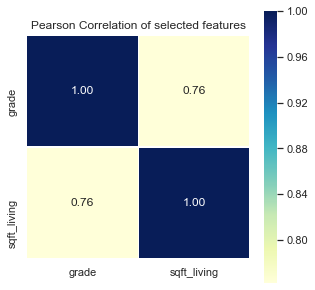

In [64]:
#using corr() function to find the pairwise correlation of all columns in our dataframe using pearson's 
#methond of standard correlation coefficient
correlation1 = file4.corr(method='pearson')
#reordering data from biggest to largest values correlation values for better visual representation of the matrix
new_columns = correlation1.nlargest(20, 'grade').index
#getting Pearson product-moment correlation coefficients from our sorted data for correlation matrix
#using property T to reflect the dataframe over its main diagonal by writing columns as rows 
corr_map1 = np.corrcoef(file4[new_columns].values.T)
#setting the font of text in the matrix to 1, so it is readable 
sns.set(font_scale=1)

#plotting color-encoded correlation matrix
#title for the plot
#setting its size bigger
plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of selected features')
heatmap = sns.heatmap(corr_map1, cbar = True, linewidths=0.5, linecolor='w', cmap="YlGnBu", annot = True, square = True, fmt = '.2f', yticklabels = new_columns.values, xticklabels = new_columns.values)




In [81]:
#Pearson's r
stats.pearsonr(file5['log(price)'], file5['sqft_living'])

(0.6953405986033456, 0.0)

In [79]:
stats.pearsonr(file5['log(price)'], file5['grade'])

(0.7036341238565467, 0.0)

**Result and Conclusion**

As we saw from the p-value interpretations, it is very low (0) for all predictor variables in the final model. This suggests that the slope, coefficient, of those variables is not zero as well and that changes in the predictor variable are associated with changes in the response variable. Those coefficients  show that the changes in the predictor variables will result in percentage change, instead of normal units because our response variable is logarithm (Ford, 2018). The formula to transform units into percentage is (Ford, 2018):

$(e^x −1)*100$


Thus, we get that:
1. If there is no grade from the King County for the house according to their standard and no living room area in the house, the value of log(price) is expected to be 11.174.
2. If we keep the same living room area, for every increase in the grade value, the price of the house goes up by roughly 20.39%.
3. If we keep the same grade for the house, the price of a house increases by 0.02% for every additional square foot of the living room area.

Analysis and interpretation of the data throughout this paper, answers the question raised in the introduction. Therefore, we can conclude that among selected features of the house, that the grade of the house by the King County influenced the selling price of the house the most. As this model is built using five variables with highest Pearson’s Correlation values contributing to the house price, we can induce that grade of the house impacts more than any other variable the selling price in King County.

Our final model with the adjusted R-squared value of 0.555, and the extremely small
p-value of the coefficients indicates moderately the statistical significance of the independent,
predictors, variables on the dependent, responsive, variable . However, because this model is
built on data gathered only from one country and during a short period of time, it has inference limits. For example, because of the short span of the data gathering and usage of adjusted R-squared instead of p-value for regression model, we can’t predict future selling prices. Thus, we can use it only for King County to determine the significance of the predictor variables. In addition, we can’t infer a causal relationship between selected variables.
As we used only five variables to build this model, it is not very reliable to determine the house price even within given limits as it only explains 55.5% of variance in dependent variable. To improve this model for a better determination, we would need to use more variables to find another model which explains more variance. We could use a backward selection regression model for checking all variables. Also, to make this model generalized at least for the state of Washington, we would need data from more counties and over a longer period of time